In [36]:
import osmnx as ox
import geopandas as gpd

In [37]:
restaurant_ffm = ox.geometries_from_place(
            'Frankfurt, DE',
            tags = {'amenity':'restaurant'})

/var/folders/w2/d85dyngj6s1c1r5cbq12qkz00000gn/T/ipykernel_32937/2902853665.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  restaurant_ffm = ox.geometries_from_place(


/var/folders/w2/d85dyngj6s1c1r5cbq12qkz00000gn/T/ipykernel_28400/3994815281.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


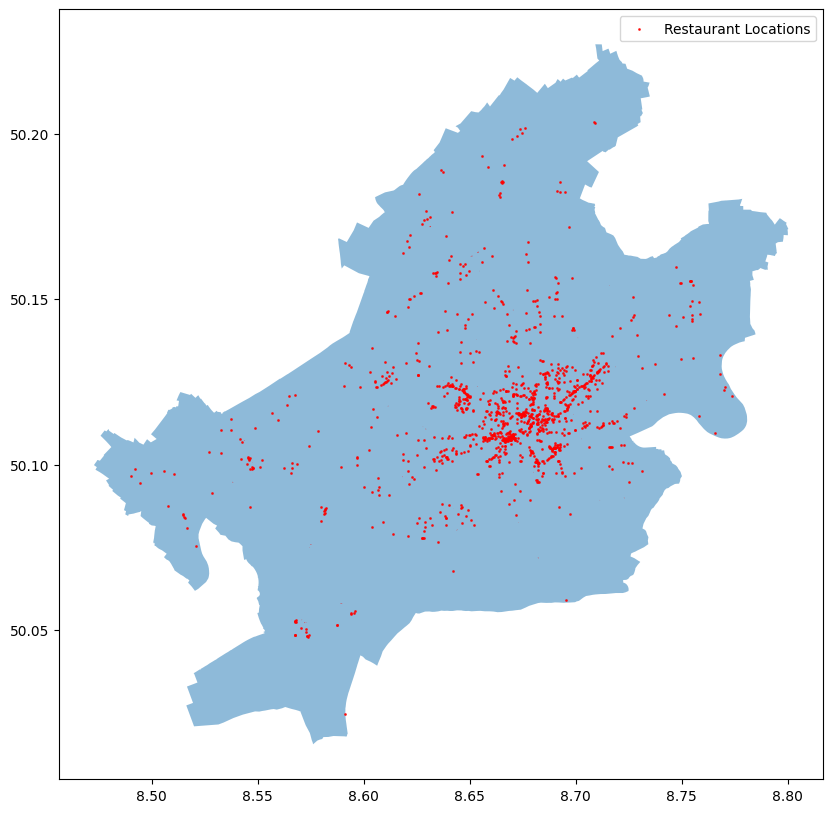

In [27]:
ffm_gdf = ox.geocoder.geocode_to_gdf('Frankfurt, DE')

# Set up a plot axis
fig, ax = plt.subplots(figsize = (15,10))

# Visualise both on the plot
ffm_gdf.plot(ax = ax, alpha = 0.5)
restaurant_ffm.plot(ax = ax, markersize = 1, color = 'red', alpha = 0.8, label = 'Restaurant Locations')
plt.legend()

In [39]:
restaurant_ffm

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                          
node         32419989    Frankfurt am Main               49         60487   
             32419990    Frankfurt am Main               2a         60431   
             32419991    Frankfurt am Main                8         60431   
             32422167    Frankfurt am Main                3         60431   
             33978898                  NaN              NaN           NaN   
...                                    ...              ...           ...   
way          579560993                 NaN              NaN           NaN   
             580602357                 NaN              NaN           NaN   
             618283007   Frankfurt am Main               99         60326   
             633068781                 NaN              NaN           NaN   
             1070032828  Frankfurt am Main              102         60486   

                                    addr:street     amenity        cuisine  \
element_type osmid                                                           
node         32419989     Ginnheimer Landstraße  restaurant         jewish   
             32419990           Ginnheimer Hohl  restaurant         balkan   
             32419991    Am Ginnheimer Wäldchen  restaurant            NaN   
             32422167    Am Ginnheimer Wäldchen  restaurant  international   
             33978898                       NaN  restaurant            NaN   
...                                         ...         ...            ...   
way          579560993                      NaN  restaurant            NaN   
             580602357                      NaN  restaurant            NaN   
             618283007             Kleyerstraße  restaurant            NaN   
             633068781                      NaN  restaurant        turkish   
             1070032828           Am Dammgraben  restaurant     vietnamese   

                        diet:kosher                                  name  \
element_type osmid                                                          
node         32419989           yes                    Makkabi Sports Bar   
             32419990           NaN                             Zum Adler   
             32419991           NaN                  Ginnheimer Wirtshaus   
             32422167           NaN                 Restaurant Event Exis   
             33978898           NaN                     Friedberger Warte   
...                             ...                                   ...   
way          579560993          NaN  Internationales Restaurant Fl Aromen   
             580602357          NaN                Restaurant und Taverne   
             618283007          NaN                                    Ui   
             633068781          NaN       Gartenrestaurant KGV Cronberger   
             1070032828         NaN                               Ong Tao   

                                   phone  \
element_type osmid                         
node         32419989      +491727038033   
             32419990        +4969520981   
             32419991      +4969 9552400   
             32422167    +49 69 53 10 52   
             33978898                NaN   
...                                  ...   
way          579560993               NaN   
             580602357               NaN   
             618283007   +49 69 54806910   
             633068781               NaN   
             1070032828              NaN   

                                                                  website  \
element_type osmid                                                          
node         32419989    https://makkabi-frankfurt.de/makkabi-sports-bar/   
             32419990                               https://zumadler.net/   
             32419991                         www.ginnheimer-wirtshaus.de   
             32422167                         https://ex

In [46]:
restaurant_ffm['geometry']

element_type  osmid     
node          32419989                               POINT (8.64532 50.13404)
              32419990                               POINT (8.64923 50.14409)
              32419991                               POINT (8.64382 50.14562)
              32422167                               POINT (8.63915 50.14081)
              33978898                               POINT (8.69929 50.14062)
                                                  ...                        
way           579560993     POLYGON ((8.57190 50.05222, 8.57195 50.05214, ...
              580602357     POLYGON ((8.57300 50.05223, 8.57306 50.05212, ...
              618283007     POLYGON ((8.61820 50.09642, 8.61835 50.09642, ...
              633068781     POLYGON ((8.70116 50.13842, 8.70118 50.13836, ...
              1070032828    POLYGON ((8.62916 50.11085, 8.62956 50.11075, ...
Name: geometry, Length: 1265, dtype: geometry

In [42]:
missing_values = restaurant_ffm.isnull().sum().sort_values()
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})


In [45]:
missing_df[:10]

,Column,Missing Values
0,amenity,0
1,geometry,0
2,name,5
3,cuisine,333
4,opening_hours,401
5,wheelchair,462
6,addr:street,689
7,addr:housenumber,702
8,website,716
9,addr:postcode,728


In [47]:
cuisine_counts = restaurant_ffm['cuisine'].value_counts()
cuisine_counts = cuisine_counts[cuisine_counts >5]

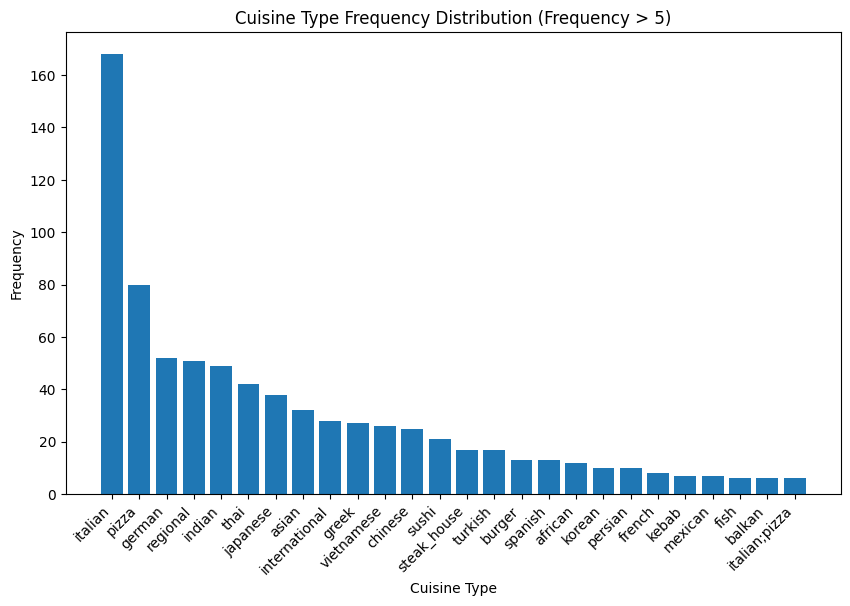

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Cuisine Type Frequency Distribution (Frequency > 5)')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.show()

In [60]:
wheel_counts = restaurant_ffm['wheelchair'].value_counts(dropna=False)

In [61]:
labels = wheel_counts.index
values = wheel_counts.values

In [58]:
import seaborn as sns

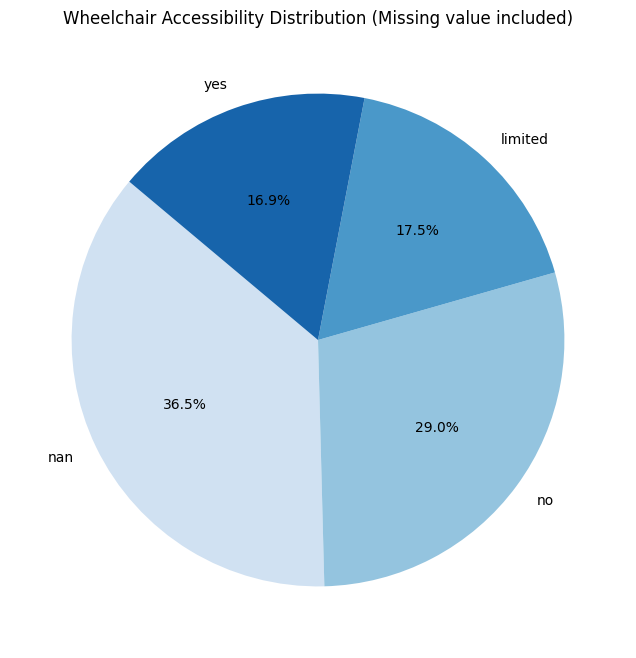

In [64]:
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140,colors=sns.color_palette("Blues", len(labels)))
plt.title('Wheelchair Accessibility Distribution (Missing value included)')
plt.show()